In [48]:
import pandas as pd
import numpy as np

In [11]:
# load dataset
df = pd.read_csv("cavendish_weather_2025.csv")

In [12]:
# preview first 8 rows
print("\nSample Data:")
display(df.head(8))


Sample Data:


date temp_c  humidity_pct  wind_kmh  precip_mm  station
0  2024-01-01  27.83          66.5      13.8       2.43  Kampala
1  2024-01-02  27.86          59.5      20.5       3.35  Kampala
2  2024-01-03   28.0           NaN      17.1       5.00  Kampala
3  2024-01-04  29.04          60.3      13.3       3.96  Kampala
4  2024-01-05  28.11          69.5      11.4       4.25  Kampala
5  2024-01-06  26.54          66.5      10.2       0.00  Kampala
6  2024-01-07   28.8          55.2       6.4       1.56  Kampala
7  2024-01-08  28.15          65.7      12.0       0.00  Kampala

In [20]:
# Basic structure
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)

Shape: (223, 6)

Data types:
 date             object
temp_c           object
humidity_pct    float64
wind_kmh        float64
precip_mm       float64
station          object
dtype: object


In [21]:
#ISSUES NOTICED
#humidity_pct has a missing value (e.g., 1/3/2024).
#date is object, not date type yet.
#temp_c is read as object, needs to be formatted to float type

In [22]:
numeric_cols = df.select_dtypes(include=['number']).columns
# Replace invalid strings in all numeric columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: pd.to_numeric(col, errors='coerce'))

In [24]:
df['temp_c'] = df['temp_c'].replace(['', 'NA', 'nan', '?','missing'], np.nan)

In [25]:
print("Missing values before cleaning:\n", df.isna().sum())

Missing values before cleaning:
 date            0
temp_c          2
humidity_pct    8
wind_kmh        0
precip_mm       5
station         0
dtype: int64


In [26]:
# Here in the table above we can see that variables: temp_c, humidity_pct and precip_mm have missing values.
#we shall have missing values for temp_c and humidity_pct. we shall not handle for precip_mm because it is our target variable.
# Since temp_c has only two missing value, we can choose to drop the row and apply imputation on humidity_pct, it has many missing values.

In [27]:
df = df.dropna(subset=['temp_c']) # drop the 2 rows
df['humidity_pct'] = df['humidity_pct'].fillna(df['humidity_pct'].mean()) # imputation

In [28]:
# checking whether imputation has been done
df.head()

date temp_c  humidity_pct  wind_kmh  precip_mm  station
0  2024-01-01  27.83     66.500000      13.8       2.43  Kampala
1  2024-01-02  27.86     59.500000      20.5       3.35  Kampala
2  2024-01-03   28.0     71.533333      17.1       5.00  Kampala
3  2024-01-04  29.04     60.300000      13.3       3.96  Kampala
4  2024-01-05  28.11     69.500000      11.4       4.25  Kampala

In [29]:
#Remove duplicates (if any)
before = len(df)
df.drop_duplicates(inplace=True)
duplicates_removed = before - len(df)

In [30]:
# Fix invalid ranges
invalid_humidity = df.loc[(df['humidity_pct'] < 0) | (df['humidity_pct'] > 100)].shape[0]
df.loc[df['humidity_pct'] > 100, 'humidity_pct'] = 100
df.loc[df['humidity_pct'] < 0, 'humidity_pct'] = 0

invalid_wind = df.loc[df['wind_kmh'] < 0].shape[0]
df.loc[df['wind_kmh'] < 0, 'wind_kmh'] = 0

In [31]:
#Ensure numeric columns
numeric_cols = ['temp_c', 'humidity_pct', 'wind_kmh', 'precip_mm']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [32]:
# Create a month column
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month

In [42]:
df['month'] = df['month'].astype(str)

In [33]:
print("Cleaning complete")

Cleaning complete


In [34]:
# Validation

In [43]:
#Verify data types
print(df.dtypes)

date            datetime64[ns]
temp_c                 float64
humidity_pct           float64
wind_kmh               float64
precip_mm              float64
station                 object
month                   object
dtype: object


In [44]:
# Check value ranges
print("\nHumidity range:", (df['humidity_pct'].min(), df['humidity_pct'].max()))
print("Wind range:", (df['wind_kmh'].min(), df['wind_kmh'].max()))
print("Missing values after cleaning:\n", df.isna().sum())


Humidity range: (np.float64(51.1), np.float64(94.7))
Wind range: (np.float64(0.0), np.float64(150.0))
Missing values after cleaning:
 date            0
temp_c          0
humidity_pct    0
wind_kmh        0
precip_mm       5
station         0
month           0
dtype: int64


In [39]:
df.shape

(218, 7)

In [40]:
# Summarize validation actions
validation_table = pd.DataFrame({
    "issue": [
        "Missing values for humidity/precipitation and temperature",
        "Duplicate rows",
        "Invalid humidity/wind ranges"
    ],
    "action": [
        "Imputed humidity with mean",
        "Dropped duplicates and dropped 2 rows of missing values in temperature",
        "Capped to valid range"
    ],
    "affected_rows": [
        5,
        duplicates_removed,
        invalid_humidity + invalid_wind
    ]
})
display(validation_table)

issue  \
0  Missing values for humidity/precipitation and ...   
1                                     Duplicate rows   
2                       Invalid humidity/wind ranges   

                                              action  affected_rows  
0                         Imputed humidity with mean              5  
1  Dropped duplicates and dropped 2 rows of missi...              3  
2                              Capped to valid range              1

In [45]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 0 to 219
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          218 non-null    datetime64[ns]
 1   temp_c        218 non-null    float64       
 2   humidity_pct  218 non-null    float64       
 3   wind_kmh      218 non-null    float64       
 4   precip_mm     213 non-null    float64       
 5   station       218 non-null    object        
 6   month         218 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 13.6+ KB


date      temp_c  humidity_pct    wind_kmh  \
count                            218  218.000000    218.000000  218.000000   
mean   2024-04-19 04:50:38.532110080   29.984174     71.650306   10.230734   
min              2024-01-01 00:00:00   26.290000     51.100000    0.000000   
25%              2024-02-24 06:00:00   28.817500     65.000000    6.525000   
50%              2024-04-19 12:00:00   30.025000     71.850000    9.100000   
75%              2024-06-12 18:00:00   31.192500     77.450000   11.675000   
max              2024-08-07 00:00:00   34.340000     94.700000  150.000000   
std                              NaN    1.649291      8.546634   10.152202   

        precip_mm  
count  213.000000  
mean     2.154460  
min      0.000000  
25%      0.210000  
50%      1.640000  
75%      3.390000  
max     11.500000  
std      2.201136

In [ ]:
""" TEMPERATURE
Skewness

Mean ≈ Median → distribution is roughly symmetric.

No evidence of strong skew; temperature seems normally distributed around 30°C.

Outliers

Max 34.34°C is ~2.5 SD above mean → may be a mild high outlier, but not extreme.

Min 26.29°C is ~2.5 SD below mean → mild low outlier.

Conclusion: Temperature is stable with no extreme outliers.
-HUMIDITY
Skewness

Mean ≈ Median → roughly symmetric.

Slight long tail possible towards higher humidity (94.7% max), but overall fairly normal.

Outliers

Values close to 95% may be considered mild high-end outliers.

Min 51.1% is not extremely low, given tropical climate.

Conclusion: Humidity is moderately stable with a few high-end values.
-Wind (wind_kmh)
Skewness

Mean > Median → positively skewed (long tail to the right).

Most values are low (around 0–20 km/h), but the 150 km/h value stretches the tail.

Outliers

Max 150 km/h is an extreme outlier (much higher than mean + 3 SD ~ 41.7 km/h).

Could be a data entry error or storm measurement.

Conclusion: Wind distribution is highly skewed with a significant outlier.
-Precipitation (precip_mm)
Skewness

Mean > Median → positively skewed, common for precipitation.

Many days with 0 mm, few days with high rainfall → long tail to the right.

Outliers

Max 11.5 mm is mildly extreme relative to mean.

Min 0 mm → common for dry days; not an outlier.

Conclusion: Precipitation is right-skewed with occasional high rainfall events."""


In [49]:
#Exploratory Data Analysis

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

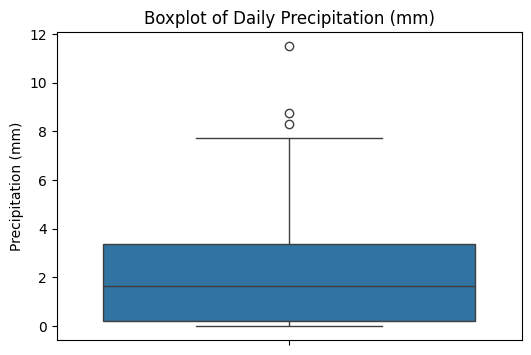

In [51]:
# Boxplot for precipitation ---
plt.figure(figsize=(6,4))
sns.boxplot(y=df['precip_mm'])
plt.title("Boxplot of Daily Precipitation (mm)")
plt.ylabel("Precipitation (mm)")
plt.show()

In [53]:
"""Outliers in boxplot above aren’t necessarily errors — just unusually high rainfall days compared to typical daily levels.

In climate data, such high rainfall days are natural extremes, not data mistakes.

So we don’t remove them, but we note that rainfall is skewed — mostly low with rare heavy rain events."""

'Outliers in boxplot above aren’t necessarily errors — just unusually high rainfall days compared to typical daily levels.\n\nIn climate data, such high rainfall days are natural extremes, not data mistakes.\n\nSo we don’t remove them, but we note that rainfall is skewed — mostly low with rare heavy rain events.'

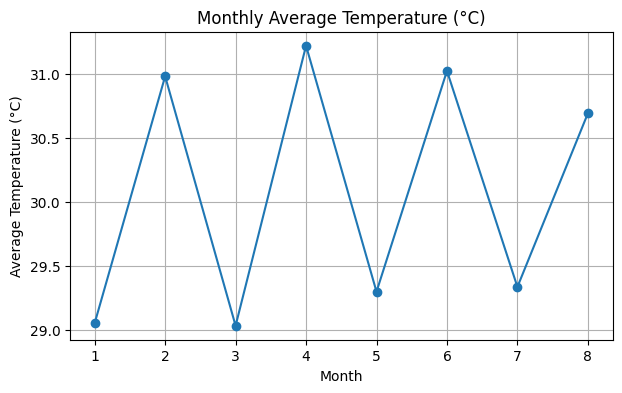

In [52]:
# Monthly average temperature trend ---
monthly_avg = df.groupby('month')['temp_c'].mean().reset_index()

plt.figure(figsize=(7,4))
plt.plot(monthly_avg['month'], monthly_avg['temp_c'], marker='o')
plt.title("Monthly Average Temperature (°C)")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()

In [54]:
"""The zigzag doesn’t mean data is wrong — it simply shows natural short-term fluctuation in temperature. no drastic jumps."""

'The zigzag doesn’t mean data is wrong — it simply shows natural short-term fluctuation in temperature. no drastic jumps.'